In [183]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
# importing the required libraries
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [185]:
# importing the training dataset
df=pd.read_csv('/content/drive/My Drive/Loan Prediction Problem/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [187]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002842,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [188]:
# Counting the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [189]:
# Checking the imbalance in dataset
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Text(0.5, 1.0, 'Class Distributions(Y: Approved || N: Rejected)')

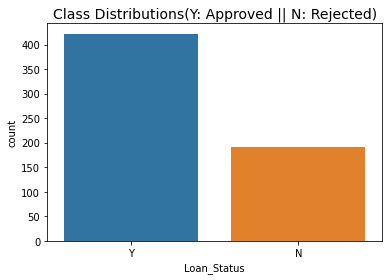

In [190]:
sns.countplot('Loan_Status', data=df)
plt.title('Class Distributions(Y: Approved || N: Rejected)', fontsize=14)

# Addressing the null/missing values in dataset

In [191]:
# Gender
print('The distribution of male and female counts in raw data is as given below:')
print(df['Gender'].value_counts())
print('The mode of Gender column is:')
df['Gender'].mode()

The distribution of male and female counts in raw data is as given below:
Male      489
Female    112
Name: Gender, dtype: int64
The mode of Gender column is:


0    Male
dtype: object

In [192]:
# Imputing the missing value in Gender column with Mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# Checking if the missing vales had been correctly imputed
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [193]:
# Married and Self_Employed column

# Columns like Married and Self_Employed falls us "Missing Not at Random" category
# Meaning, In Married column there is very high chance of leaving the field blank because the person is unmarried
# Similarly, In most of the cases the individual is not Self Employed and therefore has left the field blank
# Therefore replacing the missing values with "No" for both the columns

In [194]:
#Checking the value counts for Married column
print('The value counts for Married column is as given below:')
print(df['Married'].value_counts())

#Checking the value counts for Self_Employed column
print('The value counts for Self_Employed column in raw data is as given below:')
print(df['Self_Employed'].value_counts())


The value counts for Married column is as given below:
Yes    398
No     213
Name: Married, dtype: int64
The value counts for Self_Employed column in raw data is as given below:
No     500
Yes     82
Name: Self_Employed, dtype: int64


In [195]:
# Imputing the missing value in Married column with 'No'
df['Married'] = df['Married'].fillna('No')

# Checking if the missing vales had been correctly imputed
df['Married'].value_counts()

Yes    398
No     216
Name: Married, dtype: int64

In [196]:
df[df['Self_Employed'].isnull()]['Loan_Status'].value_counts()

Y    23
N     9
Name: Loan_Status, dtype: int64

In [197]:
# Imputing the missing value in Self_Employed column with 'No'
df['Self_Employed'] = df['Self_Employed'].fillna('No')

# Checking if the missing vales had been correctly imputed
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [198]:
# Dependents

# Checking if Married column has any relation with Dependents
df1 = df[['Married','Dependents']]
df1['Dependents'] = df1['Dependents'].replace(['0'],'N')
df1['Dependents'] = df1['Dependents'].replace(['1','2','3+'],'Y')

In [199]:
df1['Dependents'].value_counts()

N    345
Y    254
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Dependents on Married Candidates')

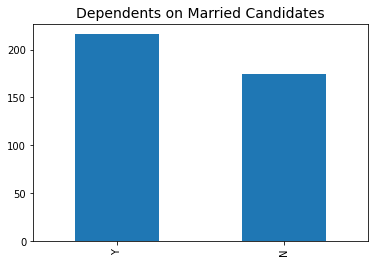

In [200]:
df1[df1['Married'] == 'Yes']['Dependents'].value_counts().plot(kind='bar')
plt.title('Dependents on Married Candidates', fontsize=14)

Text(0.5, 1.0, 'Dependents on Non-Married Candidates')

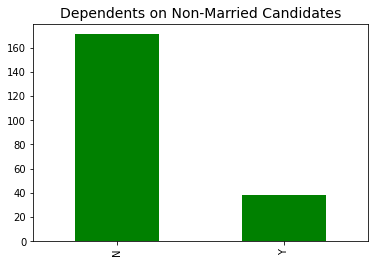

In [201]:
df1[df1['Married'] == 'No']['Dependents'].value_counts().plot(kind='bar',color ='g')
plt.title('Dependents on Non-Married Candidates', fontsize=14)

In [202]:
# For married candidates, calculating the percentage of those having dependents

Married_Total = df[df['Married'] == 'Yes']['Dependents'].value_counts().sum()
Married_Dependents_sum = Married_Total - (df[df['Married'] == 'Yes']['Dependents'].value_counts()[0])
Married_Dependents_perc = (Married_Dependents_sum/Married_Total)*100
print('Percentage of Married candidates having Dependents is', round(Married_Dependents_perc,2)  )

Percentage of Married candidates having Dependents is 55.38


In [203]:
# For Non-married candidates, calculating the percentage of those having dependents

df[df['Married'] == 'No']['Dependents'].value_counts()
Non_Married_Total = df[df['Married'] == 'No']['Dependents'].value_counts().sum()
Non_Married_Dependents_sum = Non_Married_Total - (df[df['Married'] == 'No']['Dependents'].value_counts()[0])
Non_Married_Dependents_perc = (Non_Married_Dependents_sum/Non_Married_Total)*100
print('Percentage of Non Married candidates having Dependents is', round(Non_Married_Dependents_perc,2)  )

Percentage of Non Married candidates having Dependents is 18.18


In [204]:
# Observation : There is high chance of married candidates having dependents
   # Therefore, Imputing the married and Non-married candidates with '1'(mode among dependents) and '0' respectively

In [205]:
df.loc[(df['Married'] == 'Yes') & (df['Dependents'].isnull()), 'Dependents'] = (df.iloc[1,3])
df.loc[(df['Married'] == 'No') & (df['Dependents'].isnull()), 'Dependents'] = (df.iloc[2,3])

In [206]:
# Loan_Amount_Term

df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [207]:
# Imputing the missing value in Loan_Amount_Term column with Mode
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Checking if the missing vales had been correctly imputed
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

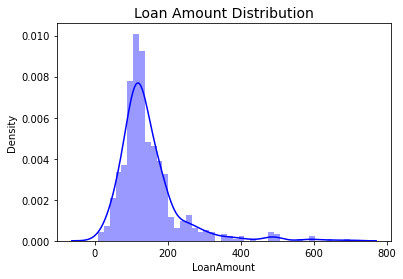

In [208]:
# Loan Amount

plt.title('Loan Amount Distribution', fontsize=14)
sns.distplot(df['LoanAmount'], color="b")

In [209]:
# Checking the mean and median of Loan Amount and identify the one to be imputed

print('The Mean of the Loan Amount is : ', df['LoanAmount'].mean() )
print('The Median of the Loan Amount is : ', df['LoanAmount'].median() )
print('The Mode of the Loan Amount is : ', df['LoanAmount'].mode()[0] )

The Mean of the Loan Amount is :  146.41216216216216
The Median of the Loan Amount is :  128.0
The Mode of the Loan Amount is :  120.0


In [210]:
# Imputing the missing value in Loan_Amount column with Median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Pandas Profiling on the Dataset

In [211]:
# !pip install pandas-profiling==2.5.0

In [212]:
# Pandas Profiling 
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("your_report.html")

Text(0.5, 1.0, 'Correlation between features')

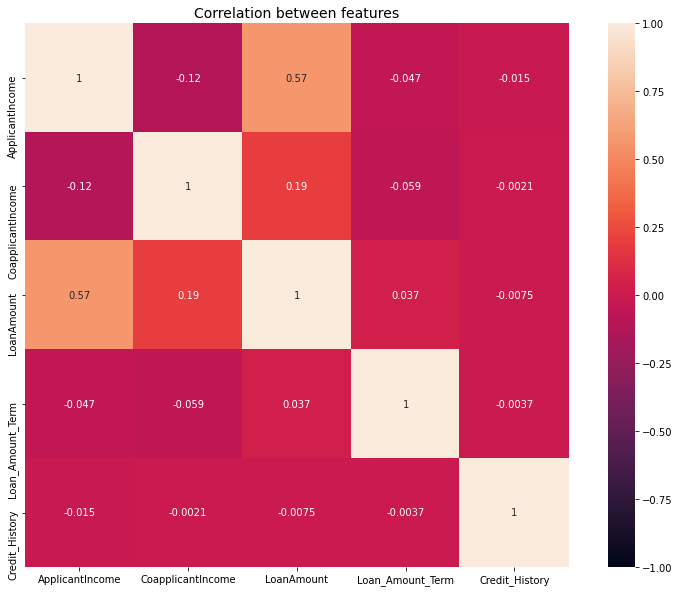

In [213]:
# Correlation Matrix

f, (ax1) = plt.subplots(1, 1, figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1)
ax1.set_title("Correlation between features", fontsize=14)

In [214]:
# Observations
   # There is good correlation between Applicants Income and Coapplicants Income with Loan Amount and Loan term

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Using KNN imputer to impute the missing value in Credit_History column

In [216]:
# Credit_History 

# Dropping the Loan_ID column
df1 = df.drop(['Loan_ID'], axis=1)

# Converting Dependents column to Integer
df1['Dependents'] = df1['Dependents'].replace(['3+'],'3')
df1['Dependents'] = df1['Dependents'].astype(int)

In [217]:
# Converting Categorical column to Numerical column

cat_variables = df1[['Gender', 'Married','Education','Self_Employed','Property_Area','Loan_Status']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

df1 = df1.drop(['Gender', 'Married','Education','Self_Employed','Property_Area','Loan_Status'], axis=1)
df1 = pd.concat([df1, cat_dummies], axis=1)
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [218]:
# All columns has been converted to numerical
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           564 non-null    float64
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Education_Not Graduate   614 non-null    uint8  
 9   Self_Employed_Yes        614 non-null    uint8  
 10  Property_Area_Semiurban  614 non-null    uint8  
 11  Property_Area_Urban      614 non-null    uint8  
 12  Loan_Status_Y            614 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 33.1 KB


In [219]:
# Scaling the dataset before using KNN Imputer

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.000000,0.070489,0.000000,0.172214,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.333333,0.054830,0.036192,0.172214,0.74359,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,0.000000,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.000000,0.072356,0.000000,0.191027,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [220]:
# Using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [221]:
df1['Credit_History'] = df1['Credit_History'].replace([0.2,0.4,0.6],0)
df1['Credit_History'] = df1['Credit_History'].replace([0.8],1)
df1['Credit_History'].value_counts()

1.0    516
0.0     98
Name: Credit_History, dtype: int64

In [222]:
df['Credit_History_I'] = df1['Credit_History']

In [223]:
df.drop(['Credit_History'],axis=1, inplace = True)
df.info()

# Missing Value Treatment completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Credit_History_I   614 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [224]:
# Converting Categorical column to Numercial columns and Scaling the dataset to be fed for Model Training

# Dropping the Loan_ID column
df = df.drop(['Loan_ID'], axis=1)

# Converting Dependents column to Integer
df['Dependents'] = df['Dependents'].replace(['3+'],'3')
df['Dependents'] = df['Dependents'].astype(int)

In [225]:
cat_variables = df[['Gender', 'Married','Education','Self_Employed','Property_Area','Loan_Status']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

df = df.drop(['Gender', 'Married','Education','Self_Employed','Property_Area','Loan_Status'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_I,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [226]:
# All columns has been converted to numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History_I         614 non-null    float64
 6   Gender_Male              614 non-null    uint8  
 7   Married_Yes              614 non-null    uint8  
 8   Education_Not Graduate   614 non-null    uint8  
 9   Self_Employed_Yes        614 non-null    uint8  
 10  Property_Area_Semiurban  614 non-null    uint8  
 11  Property_Area_Urban      614 non-null    uint8  
 12  Loan_Status_Y            614 non-null    uint8  
dtypes: float64(4), int64(2), uint8(7)
memory usage: 33.1 KB


Text(0.5, 1.0, 'Correlation between features')

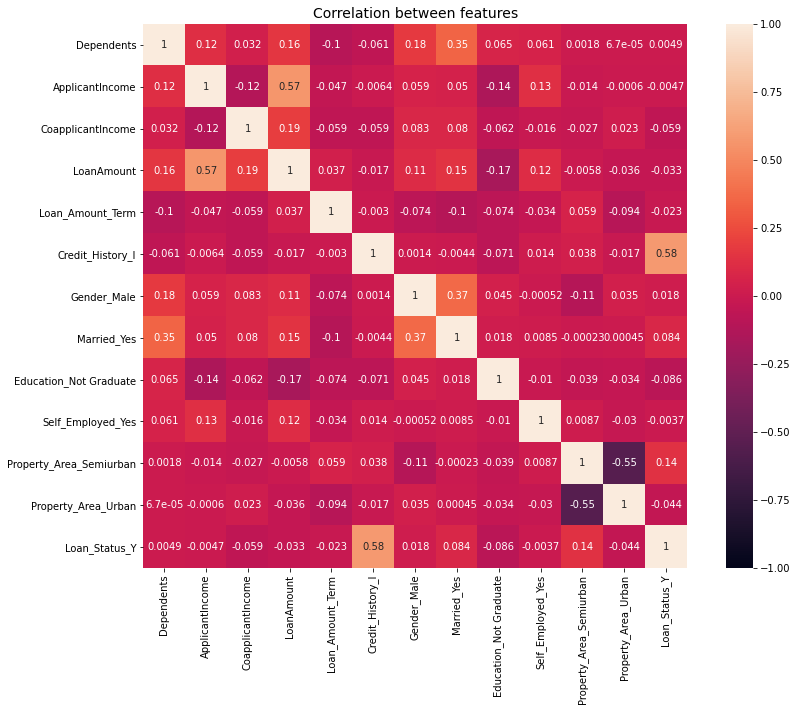

In [227]:
# Correlation Matrix
f, (ax1) = plt.subplots(1, 1, figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1, ax=ax1)
ax1.set_title("Correlation between features", fontsize=14)



In [228]:
# Credit History has very high and +ve correlation with Loan Status
# Property Area and Married has positive correlation with Loan Status
# Loan Amount and Education are negatively correlated
# Loan Amount and Applicant Income has strong correlation

Text(0.5, 1.0, 'Applicant Income Vs Loan Amount')

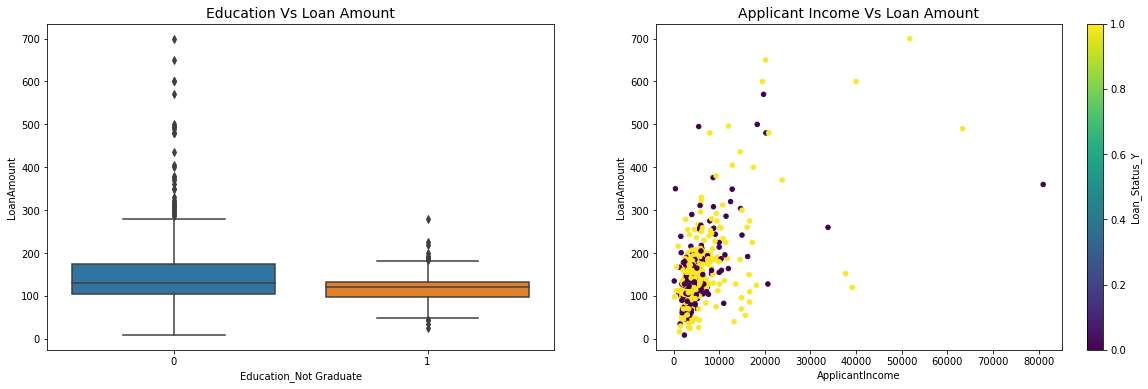

In [229]:
# Scatter plot to see the classification between Credit History, Property Area, and Married with Loan Status
# sns.pairplot(data = df, x_vars=['Credit_History_I', 'Property_Area_Semiurban', 'Married_Yes'], y_vars='Loan_Status_Y', size=5, aspect=1, kind='reg')
f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
sns.boxplot(x='Education_Not Graduate', y='LoanAmount', data=df, ax=ax1)
ax1.set_title("Education Vs Loan Amount", fontsize=14)


ax2 = df.plot.scatter(x='ApplicantIncome', y='LoanAmount', c='Loan_Status_Y', colormap='viridis', ax=ax2)
ax2.set_title("Applicant Income Vs Loan Amount", fontsize=14)

# Scaling the Dataset

In [230]:
# Scaling the dataset using Standard Scaler to standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [231]:
#  Putting feature variables to X
y = df.pop('Loan_Status_Y')
sc.fit(df)                                                                                   # fit the data to Standardscaler
df_sc = sc.transform(df)   
print(pd.DataFrame(df_sc, columns=df.columns).head())                                                            # transform the data



   Dependents  ApplicantIncome  ...  Property_Area_Semiurban  Property_Area_Urban
0   -0.753144         0.072991  ...                -0.782016             1.428147
1    0.241330        -0.134412  ...                -0.782016            -0.700208
2   -0.753144        -0.393747  ...                -0.782016             1.428147
3   -0.753144        -0.462062  ...                -0.782016             1.428147
4   -0.753144         0.097728  ...                -0.782016             1.428147

[5 rows x 12 columns]


In [232]:
# Compting skewness after scaling
pd.DataFrame(df_sc).skew()

0     0.991956
1     6.539513
2     7.491531
3     2.743053
4    -2.402112
5    -1.863380
6    -1.648795
7    -0.622252
8     1.367622
9     2.159796
10    0.497948
11    0.729723
dtype: float64

# Splitting the dataset for Training and Testing 

In [233]:
# Train-Test Split

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_sc, y, test_size = 0.2, random_state = 90) 

In [234]:
# Checking the shape of train and test data

print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (491, 12)
y_train shape:  (491,)

Test cases as below
X_test shape:  (123, 12)
y_test shape:  (123,)


# Model Development

In [235]:
# Model Import 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Create a list 
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5, p=1),RandomForestClassifier(max_depth=2, random_state=0)]

In [236]:
# Training all the models and storing the model evaluation metrics in Dictionary
Train_accuracy_dict = {}
Test_accuracy_dict = {}
Train_Precision_dict = {}
Test_Precision_dict = {}
Train_Recall_dict = {}
Test_Recall_dict = {}
Train_f1score_dict = {}
Test_f1score_dict = {}
for eachModel in models:
  model = eachModel
  model.fit(X_train, y_train)
  y_test_pred = model.predict(X_test)
  y_train_pred = model.predict(X_train)
  accuracy_train = accuracy_score(y_train_pred,y_train)    # Accuracy
  accuracy_test = accuracy_score(y_test_pred,y_test)       # Accuracy
  recall_train = recall_score(y_train_pred,y_train)        # Recall
  recall_test = recall_score(y_test_pred,y_test)           # Recall
  precision_train = precision_score(y_train_pred,y_train)  # Precision
  precision_test = precision_score(y_test_pred,y_test)     # Precision
  f1_train = f1_score(y_train_pred,y_train)                # f1-score
  f1_test = f1_score(y_test_pred,y_test)                   # f1-score
  Train_accuracy_dict[type(model).__name__] = accuracy_train
  Test_accuracy_dict[type(model).__name__] = accuracy_test
  Train_Precision_dict[type(model).__name__] = precision_train
  Test_Precision_dict[type(model).__name__] = precision_test
  Train_Recall_dict[type(model).__name__] = recall_train
  Test_Recall_dict[type(model).__name__] = recall_test
  Train_f1score_dict[type(model).__name__] = f1_train
  Test_f1score_dict[type(model).__name__] = f1_test


# Model Evaluation

In [237]:
# Plotting the accuracy of training and test dataset for the models
Train_Accuracy = pd.DataFrame(Train_accuracy_dict,index=[0]).T
Test_Accuracy = pd.DataFrame(Test_accuracy_dict,index=[1]).T
Train_Precision = pd.DataFrame(Train_Precision_dict,index=[2]).T
Test_Precision = pd.DataFrame(Test_Precision_dict,index=[3]).T
Train_Recall = pd.DataFrame(Train_Recall_dict,index=[4]).T
Test_Recall = pd.DataFrame(Test_Recall_dict,index=[5]).T
Train_f1score = pd.DataFrame(Train_f1score_dict,index=[6]).T
Test_f1score = pd.DataFrame(Test_f1score_dict,index=[7]).T

In [238]:
Model_Evaluation_Score = pd.concat([Train_Accuracy, Test_Accuracy, Train_Precision, Test_Precision, Train_Recall, Test_Recall, Train_f1score, Test_f1score], axis=1, join='inner')
Model_Evaluation_Score.rename(columns = {0 : 'Train_Accuracy', 1 : 'Test_Accuracy',2 : 'Train_Precision', 3 : 'Test_Precision',4 : 'Train_Recall', 5 : 'Test_Recall',6 : 'Train_f1score', 7 : 'Test_f1score',}, inplace = True)
display(Model_Evaluation_Score)

,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_f1score,Test_f1score
LogisticRegression,0.832994,0.788618,0.979412,0.987805,0.816176,0.764151,0.890374,0.861702
DecisionTreeClassifier,1.000000,0.731707,1.000000,0.792683,1.000000,0.802469,1.000000,0.797546
KNeighborsClassifier,0.841141,0.764228,0.973529,0.963415,0.827500,0.752381,0.894595,0.844920
RandomForestClassifier,0.835031,0.788618,0.985294,0.987805,0.815085,0.764151,0.892144,0.861702


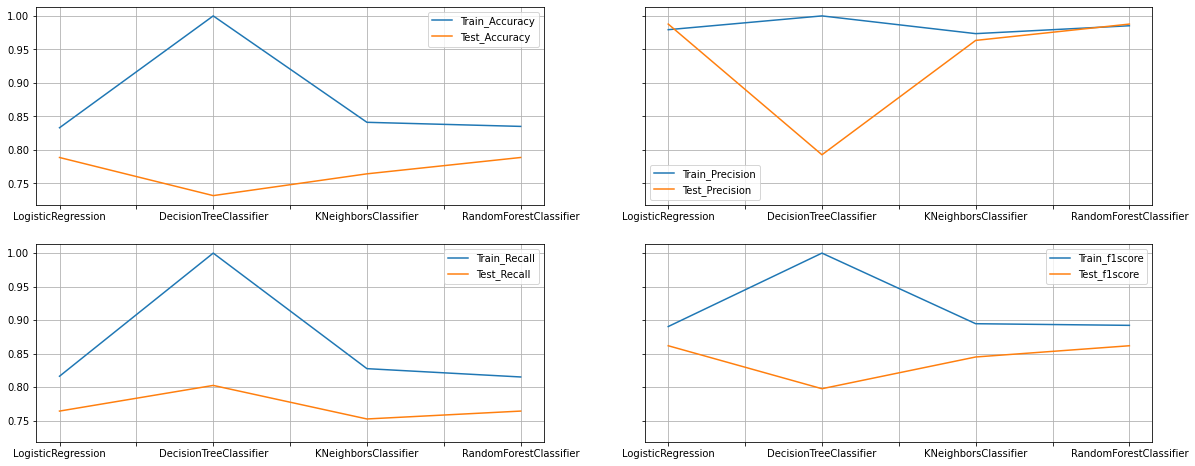

In [239]:

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,8), sharey=True)

Model_Evaluation_Score[['Train_Accuracy','Test_Accuracy']].plot(ax=ax1, grid = 'on')
Model_Evaluation_Score[['Train_Precision','Test_Precision']].plot(ax=ax2, grid = 'on')
Model_Evaluation_Score[['Train_Recall','Test_Recall']].plot(ax=ax3, grid = 'on')
Model_Evaluation_Score[['Train_f1score','Test_f1score']].plot(ax=ax4, grid = 'on')

 - As we see, The Vanilla Decision Tree Classifier overfits.
 - Also, Logistic Regression and Random Forest are slightly better than KNN

# Confusion Matrix

In [240]:
 # Model Training
 
 from sklearn.metrics import confusion_matrix

 Logreg = LogisticRegression()
 Dtree = DecisionTreeClassifier()
 knn = KNeighborsClassifier(n_neighbors=5, p=1)
 rfc = RandomForestClassifier(max_depth=2, random_state=0)
 
 # Model Training
 Logreg.fit(X_train, y_train)
 Dtree.fit(X_train, y_train)
 knn.fit(X_train, y_train)
 rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

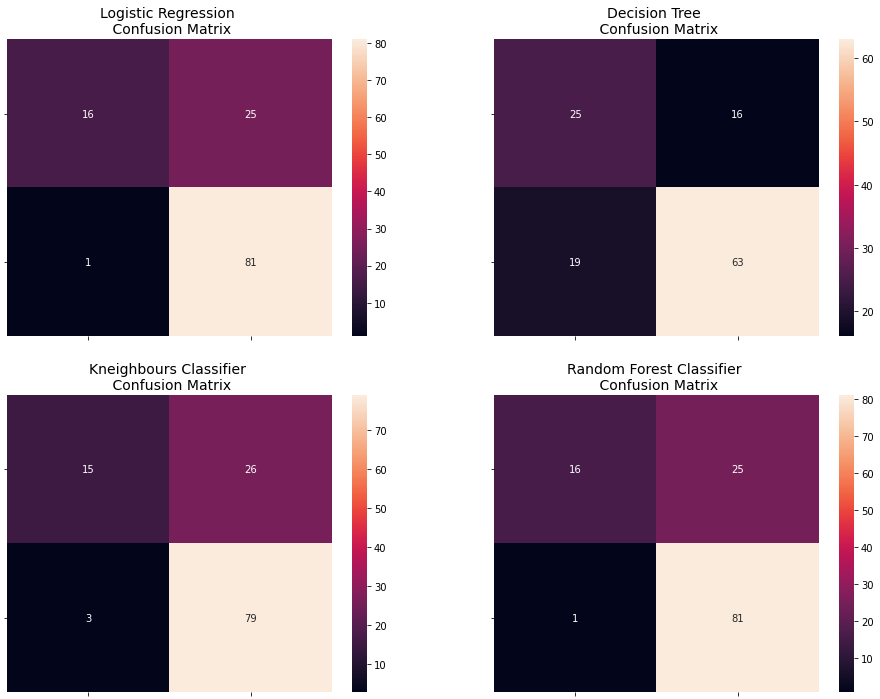

In [241]:
# Predictions
y_pred_Logreg = Logreg.predict(X_test)
y_pred_Dtree = Dtree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

# Confusion Matrix
Logreg_cf = pd.DataFrame(confusion_matrix(y_test, y_pred_Logreg))
Dtree_cf = confusion_matrix(y_test, y_pred_Dtree)
knn_cf = confusion_matrix(y_test, y_pred_knn)
rfc_cf = confusion_matrix(y_test, y_pred_rfc)

#Logreg_cf.index = ['Actual Not Approved','Actual Approved']
#Logreg_cf.columns = ['Predicted Not Approved','Predicted Approved']

fig, ax = plt.subplots(2, 2,figsize=(16,12))

sns.heatmap(Logreg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(Dtree_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(knn_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Kneighbours Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rfc_cf, ax=ax[1][1], annot=True)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [242]:
from sklearn.metrics import classification_report


print('Tuned Logistic Regression:')
print(classification_report(y_test, y_pred_Logreg))

print('Tuned Decision Tree:')
print(classification_report(y_test, y_pred_Dtree))

print('Tuned KNears Neighbors:')
print(classification_report(y_test, y_pred_knn))

print('Tuned Random Forest Classifier:')
print(classification_report(y_test, y_pred_rfc))


Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.39      0.55        41
           1       0.76      0.99      0.86        82

    accuracy                           0.79       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.79      0.76       123

Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        41
           1       0.80      0.77      0.78        82

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123

Tuned KNears Neighbors:
              precision    recall  f1-score   support

           0       0.83      0.37      0.51        41
           1       0.75      0.96      0.84        82

    accuracy                           0.76       123
   macro avg       0.79      0.66      0.68       123
we

# Tuning the Model Hyperparameter to see if the results improve

In [243]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_



# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

# RandomForest Classifier


# Create the random grid
rfc_params = {'n_estimators': [100, 400, 700, 1000, 1500],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'bootstrap': [True, False],
               'criterion': ["gini", "entropy"],
               'max_depth': list(range(2,4,1)), 
               'min_samples_leaf': list(range(5,7,1))}
n_iter_search = 100
grid_rfc = RandomizedSearchCV(RandomForestClassifier(), rfc_params, n_iter = n_iter_search, n_jobs = -1)
grid_rfc.fit(X_train, y_train)

# tree best estimator
rfc_clf = grid_tree.best_estimator_


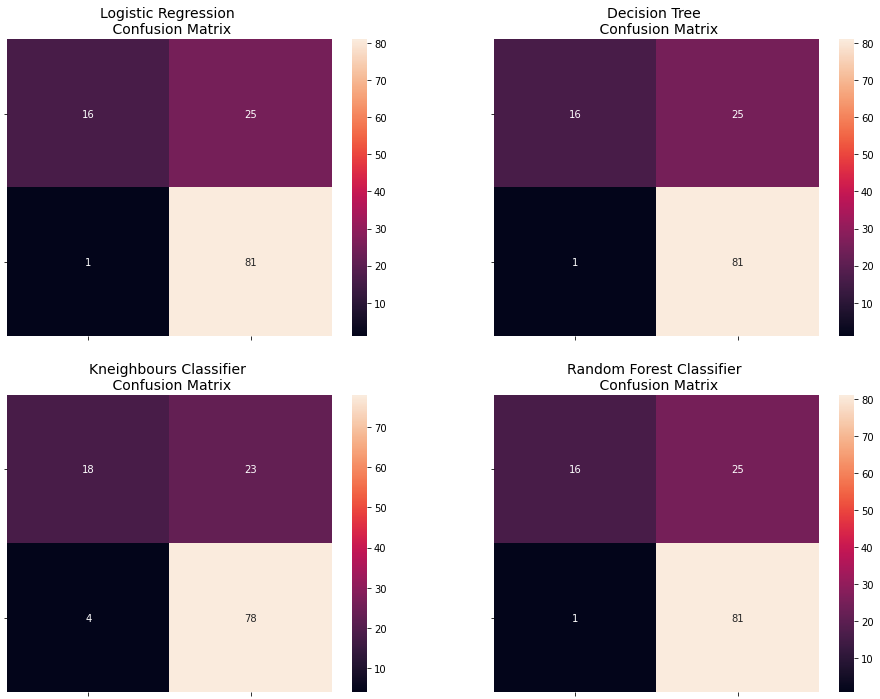

In [244]:
# Predictions
y_pred_Logreg_t = grid_log_reg.predict(X_test)
y_pred_Dtree_t = grid_tree.predict(X_test)
y_pred_knn_t = grid_knears.predict(X_test)
y_pred_rfc_t = grid_rfc.predict(X_test)

# Confusion Matrix
grid_log_reg_cf = pd.DataFrame(confusion_matrix(y_test, y_pred_Logreg_t))
grid_tree_cf = confusion_matrix(y_test, y_pred_Dtree_t)
grid_knears_cf = confusion_matrix(y_test, y_pred_knn_t)
grid_rfc_cf = confusion_matrix(y_test, y_pred_rfc_t)

fig, ax = plt.subplots(2, 2,figsize=(16,12))

sns.heatmap(grid_log_reg_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(grid_tree_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(grid_knears_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Kneighbours Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(grid_rfc_cf, ax=ax[1][1], annot=True)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

 - Performance of Decision Tree has imporved drastically after tuning the Hyperparameter of the model
 - Performance of other models remains the same even after tuning the Hyperparameter

In [245]:
from sklearn.metrics import classification_report


print('Tuned Logistic Regression:')
print(classification_report(y_test, y_pred_Logreg_t))

print('Tuned Decision Tree:')
print(classification_report(y_test, y_pred_Dtree_t))

print('Tuned KNears Neighbors:')
print(classification_report(y_test, y_pred_knn_t))

print('Tuned Random Forest Classifier:')
print(classification_report(y_test, y_pred_rfc_t))


Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.39      0.55        41
           1       0.76      0.99      0.86        82

    accuracy                           0.79       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.79      0.76       123

Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.39      0.55        41
           1       0.76      0.99      0.86        82

    accuracy                           0.79       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.79      0.76       123

Tuned KNears Neighbors:
              precision    recall  f1-score   support

           0       0.82      0.44      0.57        41
           1       0.77      0.95      0.85        82

    accuracy                           0.78       123
   macro avg       0.80      0.70      0.71       123
we

# Oversampling the minority class using SMOTE to check if results improve

In [246]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print(counter)

Counter({1: 340, 0: 151})


In [247]:
# Transform the dataset

oversample = SMOTE()
X_new, y_new = oversample.fit_resample(X_train, y_train)

In [248]:
counter = Counter(y_new)
print(counter)

Counter({0: 340, 1: 340})


In [249]:
 # Model Training
grid_log_reg_new = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg_new.fit(X_new, y_new)

grid_tree_new = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree_new.fit(X_new, y_new)

grid_knears_new = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears_new.fit(X_new, y_new)

grid_rfc_new = RandomizedSearchCV(RandomForestClassifier(), rfc_params, n_iter = n_iter_search, n_jobs = -1)
grid_rfc_new.fit(X_new, y_new)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

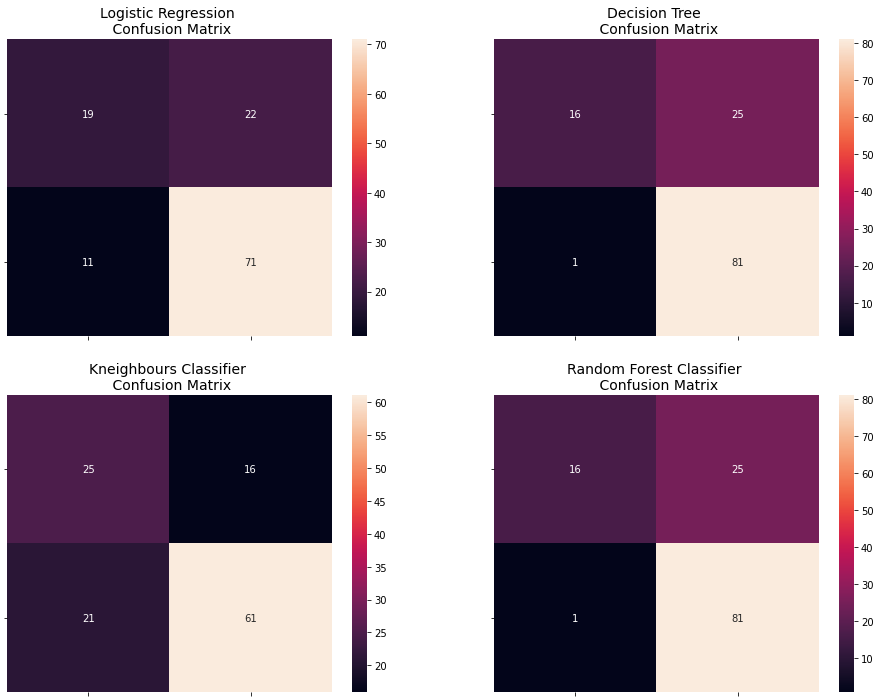

In [250]:
# Predictions
y_pred_Logreg_new = grid_log_reg_new.predict(X_test)
y_pred_Dtree_new = grid_tree_new.predict(X_test)
y_pred_knn_new = grid_knears_new.predict(X_test)
y_pred_rfc_new = grid_rfc_new.predict(X_test)

# Confusion Matrix
grid_log_reg_new_cf = pd.DataFrame(confusion_matrix(y_test, y_pred_Logreg_new))
grid_tree_new_cf = confusion_matrix(y_test, y_pred_Dtree_new)
grid_knears_new_cf = confusion_matrix(y_test, y_pred_knn_new)
grid_rfc_new_cf = confusion_matrix(y_test, y_pred_rfc_new)

fig, ax = plt.subplots(2, 2,figsize=(16,12))

sns.heatmap(grid_log_reg_new_cf, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(grid_tree_new_cf, ax=ax[0][1], annot=True)
ax[0][1].set_title("Decision Tree \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(grid_knears_new_cf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Kneighbours Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(grid_rfc_new_cf, ax=ax[1][1], annot=True)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [251]:
from sklearn.metrics import classification_report


print('Tuned Logistic Regression:')
print(classification_report(y_test, y_pred_Logreg_new))

print('Tuned Decision Tree:')
print(classification_report(y_test, y_pred_Dtree_new))

print('Tuned KNears Neighbors:')
print(classification_report(y_test, y_pred_knn_new))

print('Tuned Random Forest Classifier:')
print(classification_report(y_test, y_pred_rfc_new))

Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.46      0.54        41
           1       0.76      0.87      0.81        82

    accuracy                           0.73       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.72      0.73      0.72       123

Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.39      0.55        41
           1       0.76      0.99      0.86        82

    accuracy                           0.79       123
   macro avg       0.85      0.69      0.71       123
weighted avg       0.82      0.79      0.76       123

Tuned KNears Neighbors:
              precision    recall  f1-score   support

           0       0.54      0.61      0.57        41
           1       0.79      0.74      0.77        82

    accuracy                           0.70       123
   macro avg       0.67      0.68      0.67       123
we

# Observations

  - We have trained the models by using 3 different methodology
     - Vanilla Model
     - Hyperparameter Tuning
     - Oversampling the minority class using SMOTE
  - Acccuracy of Decision Tree improves by tuning the Hyperparameters
  - However, the accuracy remains the same for Random Forest, Logistic Regression and K-Nearest Neighbours
  - K-Nearest Neighbours performs worst compared to other Algorithm
  - Oversampling decreases the accuracy and performance of Logistic Regression and KNN
  - We can choose any model among Logistic Regression, Decision Tree and Random Forest Classifier that are Hyperparameter tuned
  - Among the Vanilla, Hyperparameter Tuning and Oversampling, following models are best and have equal performance
     - Vanilla Model
         - Logistic Regression
         - Random Forest Classifier
     - Hyperparameter Tuning
         - Logistic Regression
         - Decision Tree Classifier
         - Random Forest Classifier
     - Oversampling using SMOTE
         - Decision Tree Classifier
         - Random Forest Classifier

  - Below are the Model Evaluation Metrics for all 4 algorithms after tuning the algorithm and Oversampling the minority class using SMOTE
  - Tuned Logistic Regression:
                            precision    recall  f1-score   support

           0                  0.94      0.39      0.55        41
           1                  0.76      0.99      0.86        82
           accuracy                               0.79       123
           macro avg          0.85      0.69      0.71       123
           weighted avg       0.82      0.79      0.76       123

  - Decision Tree:
                           precision    recall  f1-score   support

           0                  0.94      0.39      0.55        41
           1                  0.76      0.99      0.86        82
           accuracy                               0.79       123
           macro avg          0.85      0.69      0.71       123
           weighted avg       0.82      0.79      0.76       123

  - KNears Neighbors:
                           precision    recall  f1-score   support

           0                  0.82      0.44      0.57        41
           1                  0.77      0.95      0.85        82
           accuracy                               0.78       123
           macro avg          0.80      0.70      0.71       123
           weighted avg       0.79      0.78      0.76       123

  - Random Forest Classifier:
                           precision    recall  f1-score   support

           0                  0.94      0.39      0.55        41
           1                  0.76      0.99      0.86        82
           accuracy                               0.79       123
           macro avg          0.85      0.69      0.71       123
           weighted avg       0.82      0.79      0.76       123

# Loading the Dataset on which prediction are to be made

In [252]:
# importing the training dataset
Submission_data = pd.read_csv('/content/drive/My Drive/Loan Prediction Problem/test_lAUu6dG.csv')
Submission_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [253]:
Submission_data.shape

(367, 12)

In [254]:
Submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Addressing the Missing Values

In [255]:
# Gender
Submission_data['Gender'] = Submission_data['Gender'].fillna(Submission_data['Gender'].mode()[0])

# Dependents
Submission_data.loc[(Submission_data['Married'] == 'Yes') & (Submission_data['Dependents'].isnull()), 'Dependents'] = (Submission_data.iloc[1,3])
Submission_data.loc[(Submission_data['Married'] == 'No') & (Submission_data['Dependents'].isnull()), 'Dependents'] = (Submission_data.iloc[0,3])

# Self Employed
Submission_data['Self_Employed'] = Submission_data['Self_Employed'].fillna('No')

#Loan_Amount_Term
Submission_data['Loan_Amount_Term'] = Submission_data['Loan_Amount_Term'].fillna(Submission_data['Loan_Amount_Term'].mode()[0])

#Loan_Amount
Submission_data['LoanAmount'] = Submission_data['LoanAmount'].fillna(Submission_data['LoanAmount'].median())

In [256]:
# Credit_History 

# Dropping the Loan_ID column
sd = Submission_data.drop(['Loan_ID'], axis=1)
print(sd['Credit_History'].value_counts())
# Converting Dependents column to Integer
sd['Dependents'] = sd['Dependents'].replace(['3+'],'3')
sd['Dependents'] = sd['Dependents'].astype(int)

# Converting Categorical column to Numerical column

cat_variables = sd[['Gender', 'Married','Education','Self_Employed','Property_Area']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)

sd = sd.drop(['Gender', 'Married','Education','Self_Employed','Property_Area'], axis=1)
sd = pd.concat([sd, cat_dummies], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sd = pd.DataFrame(scaler.fit_transform(sd), columns = sd.columns)

# Using KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
sd = pd.DataFrame(imputer.fit_transform(sd),columns = sd.columns)

sd['Credit_History'] = sd['Credit_History'].replace([0.2,0.4,0.6],0)
sd['Credit_History'] = sd['Credit_History'].replace([0.8],1)
print(sd['Credit_History'].value_counts())

Submission_data['Credit_History_I'] = sd['Credit_History']

Submission_data.drop(['Credit_History'],axis=1, inplace = True)

1.0    279
0.0     59
Name: Credit_History, dtype: int64
1.0    301
0.0     66
Name: Credit_History, dtype: int64


In [257]:
Submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  Credit_History_I   367 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Transforming the dataset to be fed as an input to Model

In [258]:
# Converting Categorical column to Numercial columns and Scaling the dataset to be fed for Model Training

# Dropping the Loan_ID column
Submission_data = Submission_data.drop(['Loan_ID'], axis=1)

# Converting Dependents column to Integer
Submission_data['Dependents'] = Submission_data['Dependents'].replace(['3+'],'3')
Submission_data['Dependents'] = Submission_data['Dependents'].astype(int)

cat_variables = Submission_data[['Gender', 'Married','Education','Self_Employed','Property_Area']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

Submission_data = Submission_data.drop(['Gender', 'Married','Education','Self_Employed','Property_Area'], axis=1)
Submission_data = pd.concat([Submission_data, cat_dummies], axis=1)
Submission_data.head()

# Scaling the dataset using Standard Scaler to standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(Submission_data)                                                                                   
Submission_data_sc = sc.transform(Submission_data)   

In [259]:
pd.DataFrame(Submission_data_sc).skew()

0     0.916159
1     8.441375
2     4.257357
3     2.244601
4    -2.709537
5    -1.674146
6    -1.580809
7    -0.562582
8     1.295988
9     2.662505
10    0.794417
11    0.490030
dtype: float64

# Generating the Predictions with the best performing models across methods

In [270]:
# Predictions

# Vanilla Predictions

pred_Logreg_v = Logreg.predict(Submission_data_sc)
pred_rfc_v = rfc.predict(Submission_data_sc)
print('Vanilla Logistic Regression' , Counter(pred_Logreg_v))
print('Vanilla Random Forest Classifier' , Counter(pred_rfc_v))


# Hyperparameter Tuning
pred_Logreg_t = grid_log_reg.predict(Submission_data_sc)
pred_rfc_t = grid_rfc.predict(Submission_data_sc)
pred_dtree_t = grid_tree.predict(Submission_data_sc)
print('Tuned Logistic Regression' , Counter(pred_Logreg_t))
print('Tuned Random Forest Classifier' , Counter(pred_rfc_t))
print('Tuned Decision Tree Classifier' , Counter(pred_dtree_t))

# Oversampling
pred_dtree_o = grid_tree_new.predict(Submission_data_sc)
pred_rfc_o = grid_rfc_new.predict(Submission_data_sc)
print('Oversampling Decision Tree Classifier' , Counter(pred_dtree_o))
print('Oversampling Random Forest Classifier' , Counter(pred_rfc_o))

# Converting prediction into DataFrame
pred_Logreg_v = pd.DataFrame(pred_Logreg_v, columns = ['LRV'])
pred_rfc_v = pd.DataFrame(pred_rfc_v, columns = ['RFCV'])
pred_Logreg_t = pd.DataFrame(pred_Logreg_t, columns = ['LRT'])
pred_rfc_t = pd.DataFrame(pred_rfc_t, columns = ['RFCT'])
pred_dtree_t = pd.DataFrame(pred_dtree_t, columns = ['DTT'])
Predictions = pd.concat([pred_Logreg_v, pred_rfc_v, pred_Logreg_t, pred_rfc_t, pred_dtree_t], axis=1)

# Converting DataFrame to csv format
Predictions.to_csv('Predictions.csv')

# Downloading the predictions
from google.colab import files
files.download('Predictions.csv')


Vanilla Logistic Regression Counter({1: 301, 0: 66})
Vanilla Random Forest Classifier Counter({1: 301, 0: 66})
Tuned Logistic Regression Counter({1: 301, 0: 66})
Tuned Random Forest Classifier Counter({1: 301, 0: 66})
Tuned Decision Tree Classifier Counter({1: 301, 0: 66})
Oversampling Decision Tree Classifier Counter({0: 274, 1: 93})
Oversampling Random Forest Classifier Counter({1: 220, 0: 147})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can discard the models trained on Oversampled data